# Topic Modeling Berita dengan LDA (Latent Dirichlet Allocation)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# Tahap 1: Membaca dan memproses file data
# ==============================================================================
print("Tahap 1: Membaca dan memproses file data...")
try:
    df = pd.read_csv('hasil_preprocessing_berita.csv')
    print("File 'hasil_preprocessing_berita.csv' berhasil dimuat.")
    print(f"Data shape: {df.shape}")
    print(f"Kategori yang tersedia: {df['kategori'].unique()}")
    print(f"Kolom yang tersedia: {list(df.columns)}")
except FileNotFoundError:
    raise FileNotFoundError("File 'hasil_preprocessing_berita.csv' tidak ditemukan. Pastikan file tersedia di direktori kerja.")

print(f"Data siap. Jumlah dokumen: {len(df)}")
print("-" * 30)

# ==============================================================================
# Tahap 2: Mempersiapkan dokumen untuk topic modeling
# ==============================================================================
print("Tahap 2: Mempersiapkan dokumen untuk topic modeling...")
# Gunakan langsung kolom teks bersih hasil_preprocessing
docs_for_analysis = df['hasil_preprocessing'].astype(str).tolist()
print(f"Dokumen siap untuk analisis: {len(docs_for_analysis)} dokumen")
print("-" * 30)

# ==============================================================================
# Tahap 3: Membuat vectorizer dan matriks term-document
# ==============================================================================
print("Tahap 3: Membuat vectorizer dan matriks term-document...")
vectorizer = CountVectorizer(
    stop_words=["dalam", "dan", "di", "untuk", "pada", "dengan", "yang", "itu", "ini"],
    max_features=1000,
    min_df=2,
    max_df=0.8
)
doc_term_matrix = vectorizer.fit_transform(docs_for_analysis)
print(f"Matriks term-document dibuat: {doc_term_matrix.shape}")
print("-" * 30)



Tahap 1: Membaca dan memproses file data...
File 'hasil_preprocessing_berita.csv' berhasil dimuat.
Data shape: (1600, 3)
Kategori yang tersedia: ['nasional' 'internasional' 'ekonomi' 'olahraga' 'teknologi' 'otomotif'
 'hiburan' 'gaya-hidup']
Kolom yang tersedia: ['isi', 'hasil_preprocessing', 'kategori']
Data siap. Jumlah dokumen: 1600
------------------------------
Tahap 2: Mempersiapkan dokumen untuk topic modeling...
Dokumen siap untuk analisis: 1600 dokumen
------------------------------
Tahap 3: Membuat vectorizer dan matriks term-document...
Matriks term-document dibuat: (1600, 1000)
------------------------------


In [8]:
# ==============================================================================
# Tahap 4: Melatih model LDA untuk topic modeling
# ==============================================================================
print("Tahap 4: Melatih model LDA untuk topic modeling...")
n_topics = 8  # Jumlah topik yang diinginkan (sesuai dengan 8 kategori)
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=100,
    learning_method='online'
)
lda_model.fit(doc_term_matrix)
print("Model LDA selesai dilatih!")
print("-" * 30)

# ==============================================================================
# Tahap 5: Mendapatkan topik untuk setiap dokumen
# ==============================================================================
print("Tahap 5: Mendapatkan topik untuk setiap dokumen...")
topic_assignments = lda_model.transform(doc_term_matrix)
topics = np.argmax(topic_assignments, axis=1)
probabilities = np.max(topic_assignments, axis=1)
print("Topik untuk setiap dokumen berhasil dihitung!")
print("-" * 30)

# ==============================================================================
# Tahap 6: Menampilkan hasil topik
# ==============================================================================
print("Tahap 6: Menampilkan hasil topik...")

# Mendapatkan kata-kata teratas untuk setiap topik
feature_names = vectorizer.get_feature_names_out()
topic_words = []

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # 10 kata teratas
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words.append(top_words)
    print(f"Topik {topic_idx}: {', '.join(top_words)}")

print("-" * 30)



Tahap 4: Melatih model LDA untuk topic modeling...
Model LDA selesai dilatih!
------------------------------
Tahap 5: Mendapatkan topik untuk setiap dokumen...
Topik untuk setiap dokumen berhasil dihitung!
------------------------------
Tahap 6: Menampilkan hasil topik...
Topik 0: indonesia, juta, usaha, film, persen, milik, mobil, harga, hadir, rp
Topik 1: makan, sehat, konsumsi, kandung, tubuh, tingkat, bantu, orang, risiko, lemak
Topik 2: israel, gaza, trump, palestina, kapal, as, negara, warga, hamas, serang
Topik 3: kendara, korban, bangun, sekolah, jalan, polisi, gedung, pesantren, proses, orang
Topik 4: wilayah, hujan, kondisi, gempa, barat, musim, alami, rumah, akibat, potensi
Topik 5: air, minum, malaysia, jantung, susu, laut, perempuan, terbang, salah, main
Topik 6: indonesia, arab, saudi, main, dunia, timnas, piala, laga, tanding, lawan
Topik 7: menteri, perintah, rp, jakarta, uang, persen, bank, presiden, indonesia, negara
------------------------------


In [9]:
# ==============================================================================
# Tahap 7: Analisis Proporsi Topik per Dokumen
# ==============================================================================
print("Tahap 7: Analisis proporsi topik per dokumen...")

# Membuat DataFrame untuk analisis proporsi
topic_analysis_df = pd.DataFrame({
    "Dokumen": docs_for_analysis,
    "Topik_Dominan": topics,
    "Probabilitas_Dominan": probabilities
})

# Menambahkan proporsi untuk semua topik
for i in range(n_topics):
    topic_analysis_df[f"Proporsi_Topik_{i}"] = topic_assignments[:, i]

print("Proporsi topik untuk 5 dokumen pertama:")
print(topic_analysis_df[['Dokumen', 'Topik_Dominan', 'Probabilitas_Dominan']].head())
print("-" * 30)

# ==============================================================================
# Tahap 7.5: Analisis Mapping Topik ke Kategori Asli
# ==============================================================================
print("Tahap 7.5: Analisis mapping topik ke kategori asli...")

# Analisis mapping topik ke kategori asli
topic_to_category = {}
for i in range(n_topics):
    topic_mask = topics == i
    if np.any(topic_mask):
        # Ambil kategori asli untuk dokumen dalam topik ini
        topic_categories = df.loc[topic_mask, 'kategori']
        most_common_category = topic_categories.mode().iloc[0] if not topic_categories.empty else "Unknown"
        topic_to_category[i] = most_common_category
        print(f"  Topik {i} → Kategori: {most_common_category} ({topic_categories.value_counts().iloc[0]} dokumen)")

# Analisis akurasi mapping
print(f"\nAkurasi Mapping Topik ke Kategori:")
correct_mappings = 0
total_docs = len(df)
for i, (topic, category) in enumerate(topic_to_category.items()):
    topic_mask = topics == i
    if np.any(topic_mask):
        topic_categories = df.loc[topic_mask, 'kategori']
        correct_count = (topic_categories == category).sum()
        accuracy = correct_count / len(topic_categories) * 100
        print(f"  Topik {i} ({category}): {accuracy:.1f}% akurasi ({correct_count}/{len(topic_categories)} dokumen)")
        correct_mappings += correct_count

overall_accuracy = correct_mappings / total_docs * 100
print(f"\nAkurasi Keseluruhan: {overall_accuracy:.1f}% ({correct_mappings}/{total_docs} dokumen)")
print("-" * 30)

# ==============================================================================
# Tahap 8: Analisis Proporsi Term dalam Topik
# ==============================================================================
print("Tahap 8: Analisis proporsi term dalam topik...")

# Membuat DataFrame untuk analisis term dalam topik
term_topic_analysis = []
for topic_idx in range(n_topics):
    topic_components = lda_model.components_[topic_idx]
    # Normalisasi untuk mendapatkan proporsi
    topic_proportions = topic_components / topic_components.sum()
    
    # Ambil 20 term teratas untuk setiap topik
    top_terms_idx = topic_components.argsort()[-20:][::-1]
    
    for rank, term_idx in enumerate(top_terms_idx):
        term_topic_analysis.append({
            'Topik': topic_idx,
            'Term': feature_names[term_idx],
            'Proporsi': topic_proportions[term_idx],
            'Ranking': rank + 1
        })

term_topic_df = pd.DataFrame(term_topic_analysis)

print("Top 10 term untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_terms = term_topic_df[term_topic_df['Topik'] == topic_idx].head(10)
    print(f"\nTopik {topic_idx}:")
    for _, row in topic_terms.iterrows():
        print(f"  {row['Ranking']}. {row['Term']} (proporsi: {row['Proporsi']:.4f})")

print("-" * 30)



Tahap 7: Analisis proporsi topik per dokumen...
Proporsi topik untuk 5 dokumen pertama:
                                             Dokumen  Topik_Dominan  \
0  ['wakil', 'ketua', 'dprsufmi', 'dasco', 'ahmad...              7   
1  ['jaksa', 'tuntut', 'jpu', 'tuntut', 'majelis'...              7   
2  ['menteri', 'kebudayaanfadli', 'zonmembeberkan...              3   
3  ['purnawirawan', 'tnipolri', 'gabung', 'dalamk...              7   
4  ['aktorammar', 'zonikembali', 'libat', 'edar',...              7   

   Probabilitas_Dominan  
0              0.986519  
1              0.993366  
2              0.413146  
3              0.696816  
4              0.669326  
------------------------------
Tahap 7.5: Analisis mapping topik ke kategori asli...
  Topik 0 → Kategori: hiburan (129 dokumen)
  Topik 1 → Kategori: gaya-hidup (108 dokumen)
  Topik 2 → Kategori: internasional (142 dokumen)
  Topik 3 → Kategori: nasional (98 dokumen)
  Topik 4 → Kategori: teknologi (55 dokumen)
  Topik 5 → Ka

In [10]:
# ==============================================================================
# Tabel LDA: Top terms per topik dan proporsi topik per dokumen
# ==============================================================================
from IPython.display import display

print("Tabel LDA:")

# 1) Tabel 10 term teratas per topik
try:
    top_terms_table = term_topic_df.groupby('Topik').head(10).copy()
    display(top_terms_table.reset_index(drop=True))
except Exception as e:
    print(f"Gagal menampilkan tabel top terms: {e}")

# 2) Tabel proporsi topik per dokumen (contoh 10 dokumen)
try:
    doc_topic_table = pd.DataFrame(topic_assignments, columns=[f'Proporsi_Topik_{i}' for i in range(n_topics)])
    doc_topic_table.insert(0, 'Topik_Dominan', topics)
    doc_topic_table.insert(0, 'Dokumen', docs_for_analysis)
    display(doc_topic_table.head(10))
except Exception as e:
    print(f"Gagal menampilkan tabel proporsi dokumen-topik: {e}")



Tabel LDA:


,Topik,Term,Proporsi,Ranking
0,0,indonesia,0.018468,1
1,0,juta,0.010518,2
2,0,usaha,0.008867,3
3,0,film,0.008532,4
4,0,persen,0.008513,5
...,...,...,...,...
75,7,persen,0.010075,6
76,7,bank,0.009993,7
77,7,presiden,0.009371,8
78,7,indonesia,0.009292,9


,Dokumen,Topik_Dominan,Proporsi_Topik_0,Proporsi_Topik_1,Proporsi_Topik_2,Proporsi_Topik_3,Proporsi_Topik_4,Proporsi_Topik_5,Proporsi_Topik_6,Proporsi_Topik_7
0,"['wakil', 'ketua', 'dprsufmi', 'dasco', 'ahmad...",7,0.001926,0.001926,0.001927,0.001927,0.001926,0.001925,0.001925,0.986519
1,"['jaksa', 'tuntut', 'jpu', 'tuntut', 'majelis'...",7,0.000948,0.000948,0.000948,0.000948,0.000948,0.000947,0.000947,0.993366
2,"['menteri', 'kebudayaanfadli', 'zonmembeberkan...",3,0.085777,0.000768,0.000768,0.413146,0.323988,0.101648,0.000768,0.073137
3,"['purnawirawan', 'tnipolri', 'gabung', 'dalamk...",7,0.001473,0.001473,0.058114,0.001475,0.136408,0.102769,0.001472,0.696816
4,"['aktorammar', 'zonikembali', 'libat', 'edar',...",7,0.001490,0.001492,0.001491,0.218974,0.104247,0.001491,0.001490,0.669326
5,"['ketua', 'rawan', 'solidaritas', 'merah', 'pu...",7,0.001427,0.001422,0.001423,0.145900,0.001422,0.001423,0.001422,0.845561
6,"['gerombol', 'orang', 'senjata', 'serang', 'wa...",3,0.001424,0.001422,0.126662,0.440074,0.332813,0.021094,0.001422,0.075089
7,"['jaksa', 'tuntut', 'jpu', 'tuntut', 'mantan',...",7,0.119085,0.000523,0.000523,0.000524,0.000523,0.000525,0.000523,0.877773
8,"['jaksa', 'tuntut', 'jpu', 'berat', 'jatuh', '...",7,0.000782,0.000782,0.000782,0.000782,0.000783,0.000782,0.000782,0.994524
9,"['polda', 'metro', 'jaya', 'tangguh', 'penahan...",3,0.001606,0.196005,0.223331,0.572638,0.001604,0.001605,0.001604,0.001606


Tahap 9: Visualisasi hasil topic modeling...


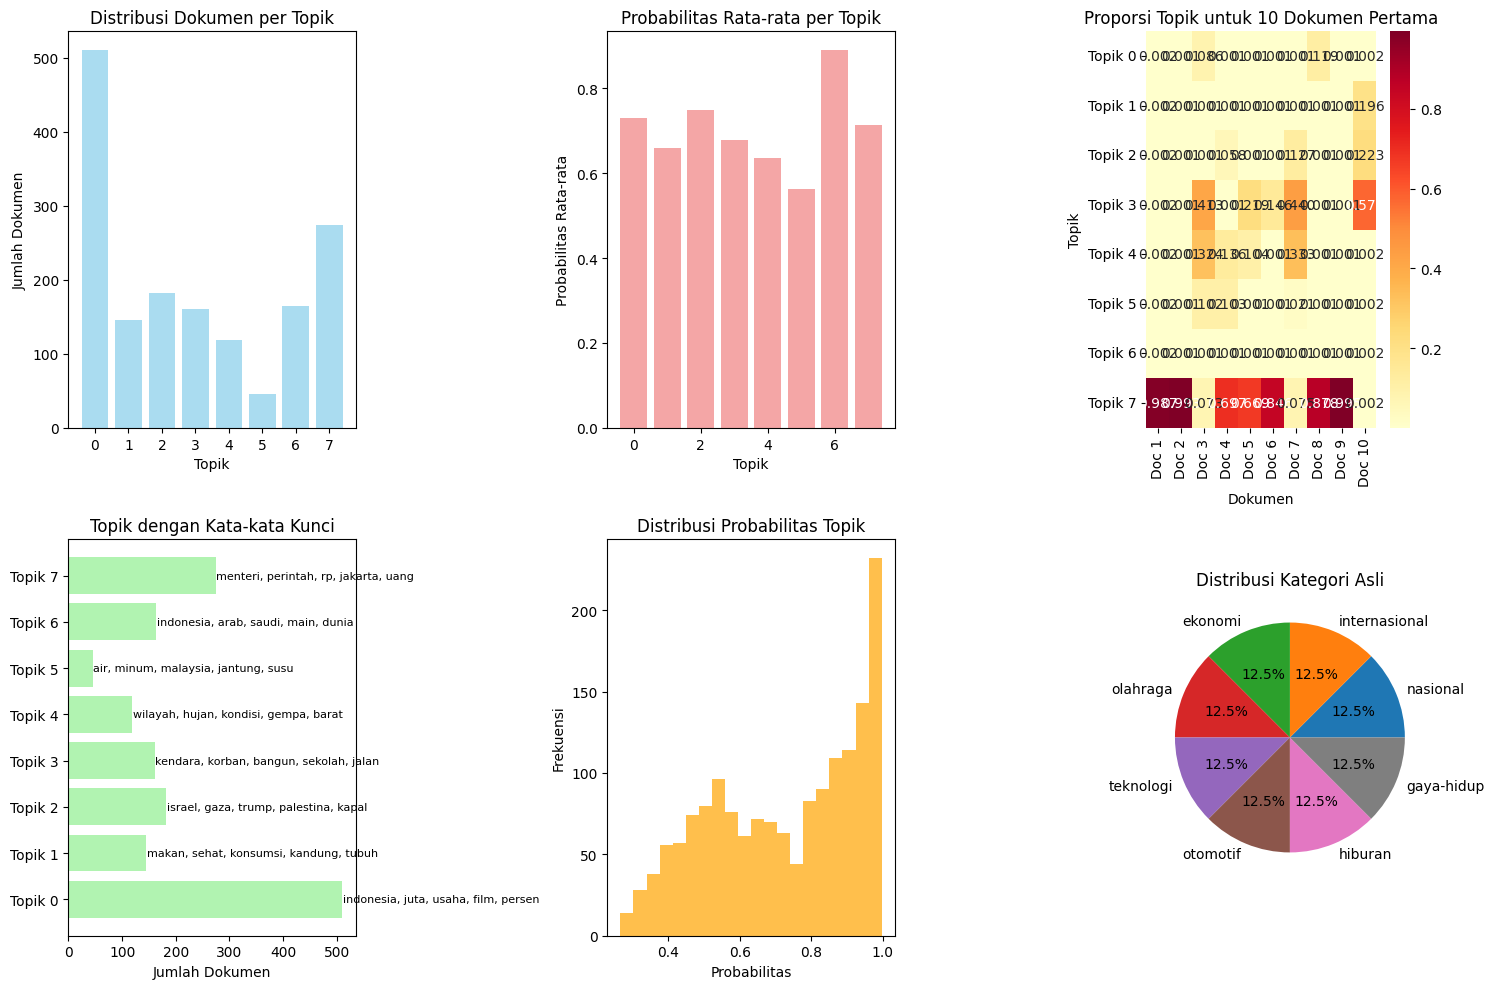

------------------------------


In [11]:
# ==============================================================================
# Tahap 9: Visualisasi Hasil Topic Modeling
# ==============================================================================
print("Tahap 9: Visualisasi hasil topic modeling...")

# 1. Visualisasi distribusi topik
plt.figure(figsize=(15, 10))

# Subplot 1: Distribusi dokumen per topik
plt.subplot(2, 3, 1)
topic_counts = np.bincount(topics)
plt.bar(range(n_topics), topic_counts, color='skyblue', alpha=0.7)
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.title('Distribusi Dokumen per Topik')
plt.xticks(range(n_topics))

# Subplot 2: Probabilitas rata-rata per topik
plt.subplot(2, 3, 2)
avg_probabilities = [np.mean(probabilities[topics == i]) for i in range(n_topics)]
plt.bar(range(n_topics), avg_probabilities, color='lightcoral', alpha=0.7)
plt.xlabel('Topik')
plt.ylabel('Probabilitas Rata-rata')
plt.title('Probabilitas Rata-rata per Topik')

# Subplot 3: Heatmap proporsi topik untuk beberapa dokumen
plt.subplot(2, 3, 3)
sample_docs = topic_assignments[:10]  # Ambil 10 dokumen pertama
sns.heatmap(sample_docs.T, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=[f'Doc {i+1}' for i in range(10)],
            yticklabels=[f'Topik {i}' for i in range(n_topics)])
plt.title('Proporsi Topik untuk 10 Dokumen Pertama')
plt.xlabel('Dokumen')
plt.ylabel('Topik')

# Subplot 4: Top words untuk setiap topik
plt.subplot(2, 3, 4)
top_words_per_topic = []
for i in range(n_topics):
    top_words = topic_words[i][:5]  # Ambil 5 kata teratas
    top_words_per_topic.append(', '.join(top_words))

y_pos = np.arange(len(top_words_per_topic))
plt.barh(y_pos, topic_counts, color='lightgreen', alpha=0.7)
plt.yticks(y_pos, [f'Topik {i}' for i in range(n_topics)])
plt.xlabel('Jumlah Dokumen')
plt.title('Topik dengan Kata-kata Kunci')
for i, words in enumerate(top_words_per_topic):
    plt.text(topic_counts[i] + 1, i, words, va='center', fontsize=8)

# Subplot 5: Distribusi probabilitas
plt.subplot(2, 3, 5)
plt.hist(probabilities, bins=20, color='orange', alpha=0.7)
plt.title('Distribusi Probabilitas Topik')
plt.xlabel('Probabilitas')
plt.ylabel('Frekuensi')

# Subplot 6: Perbandingan topik vs kategori asli
plt.subplot(2, 3, 6)
# Bandingkan topik yang ditemukan dengan kategori asli
kategori_asli = df['kategori'].value_counts()
plt.pie(kategori_asli.values, labels=kategori_asli.index, autopct='%1.1f%%')
plt.title('Distribusi Kategori Asli')

plt.tight_layout()
plt.show()

print("-" * 30)



In [12]:
# ==============================================================================
# Tahap 10: Simpan Hasil Topic Modeling ke File CSV
# ==============================================================================
print("Tahap 10: Menyimpan hasil topic modeling ke file CSV...")

# --- 1. Menyimpan Informasi Umum Setiap Topik ---
topic_info_data = []
for i in range(n_topics):
    topic_info_data.append({
        'Topik_ID': i,
        'Nama_Topik': f'Topik_{i}',
        'Kata_Kunci': ', '.join(topic_words[i][:5]),  # 5 kata teratas
        'Jumlah_Dokumen': np.sum(topics == i),
        'Persentase': f"{np.sum(topics == i)/len(topics)*100:.1f}%"
    })

topic_info_df = pd.DataFrame(topic_info_data)
topic_info_df.to_csv("informasi_topik_lda.csv", index=False, encoding="utf-8-sig")
print("File 'informasi_topik_lda.csv' berhasil disimpan.")

# --- 2. Menyimpan Hasil Topik untuk Setiap Dokumen ---
hasil_df = pd.DataFrame({
    "Dokumen": docs_for_analysis,
    "Kategori_Asli": df['kategori'].values,
    "Topik_ID": topics,
    "Probabilitas_Dominan": probabilities
})

# Menambahkan proporsi untuk semua topik
for i in range(n_topics):
    hasil_df[f"Proporsi_Topik_{i}"] = topic_assignments[:, i]

# Menambahkan informasi topik
hasil_df = pd.merge(hasil_df, topic_info_df[['Topik_ID', 'Nama_Topik', 'Kata_Kunci']], 
                   left_on='Topik_ID', right_on='Topik_ID', how='left')

# Menambahkan mapping topik ke kategori (jika topic_to_category sudah didefinisikan)
if 'topic_to_category' in globals():
    hasil_df['Kategori_Prediksi'] = hasil_df['Topik_ID'].map(topic_to_category)
    hasil_df['Mapping_Benar'] = hasil_df['Kategori_Asli'] == hasil_df['Kategori_Prediksi']
else:
    # Jika belum didefinisikan, buat mapping sederhana
    hasil_df['Kategori_Prediksi'] = "Unknown"
    hasil_df['Mapping_Benar'] = False

hasil_df.to_csv("hasil_topik_per_dokumen_lda.csv", index=False, encoding="utf-8-sig")
print("File 'hasil_topik_per_dokumen_lda.csv' berhasil disimpan.")

# --- 3. Menyimpan Analisis Term dalam Topik ---
term_topic_df.to_csv("analisis_term_dalam_topik_lda.csv", index=False, encoding="utf-8-sig")
print("File 'analisis_term_dalam_topik_lda.csv' berhasil disimpan.")

# --- 4. Menyimpan Ringkasan Statistik ---
# Hitung kategori asli untuk statistik
kategori_asli = df['kategori'].value_counts()

# Buat summary stats dengan penanganan variabel yang mungkin belum didefinisikan
summary_stats = {
    'Total_Dokumen': len(docs_for_analysis),
    'Jumlah_Topik': n_topics,
    'Jumlah_Fitur': len(feature_names),
    'Distribusi_Kategori_Asli': dict(kategori_asli),
    'Distribusi_Topik': dict(zip([f'Topik_{i}' for i in range(n_topics)], topic_counts.tolist())),
    'Probabilitas_Rata_Rata': dict(zip([f'Topik_{i}' for i in range(n_topics)], avg_probabilities))
}

# Tambahkan informasi mapping jika tersedia
if 'topic_to_category' in globals():
    summary_stats['Mapping_Topik_Kategori'] = dict(zip([f'Topik_{i}' for i in range(n_topics)], [topic_to_category.get(i, 'Unknown') for i in range(n_topics)]))
    summary_stats['Akurasi_Mapping'] = f"{overall_accuracy:.2f}%"
else:
    summary_stats['Mapping_Topik_Kategori'] = "Belum dianalisis"
    summary_stats['Akurasi_Mapping'] = "Belum dianalisis"

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv("ringkasan_topic_modeling_lda.csv", index=False, encoding="utf-8-sig")
print("File 'ringkasan_topic_modeling_lda.csv' berhasil disimpan.")

print("-" * 30)
print("Proses topic modeling selesai!")
print(f"Total dokumen: {len(docs_for_analysis)}")
print(f"Jumlah topik: {n_topics}")
print("Distribusi dokumen per topik:")
for i in range(n_topics):
    count = np.sum(topics == i)
    print(f"  Topik {i}: {count} dokumen ({count/len(topics)*100:.1f}%)")
print("\nFile yang disimpan:")
print("- informasi_topik_lda.csv")
print("- hasil_topik_per_dokumen_lda.csv") 
print("- analisis_term_dalam_topik_lda.csv")
print("- ringkasan_topic_modeling_lda.csv")



Tahap 10: Menyimpan hasil topic modeling ke file CSV...
File 'informasi_topik_lda.csv' berhasil disimpan.
File 'hasil_topik_per_dokumen_lda.csv' berhasil disimpan.
File 'analisis_term_dalam_topik_lda.csv' berhasil disimpan.
File 'ringkasan_topic_modeling_lda.csv' berhasil disimpan.
------------------------------
Proses topic modeling selesai!
Total dokumen: 1600
Jumlah topik: 8
Distribusi dokumen per topik:
  Topik 0: 510 dokumen (31.9%)
  Topik 1: 145 dokumen (9.1%)
  Topik 2: 182 dokumen (11.4%)
  Topik 3: 161 dokumen (10.1%)
  Topik 4: 119 dokumen (7.4%)
  Topik 5: 45 dokumen (2.8%)
  Topik 6: 164 dokumen (10.2%)
  Topik 7: 274 dokumen (17.1%)

File yang disimpan:
- informasi_topik_lda.csv
- hasil_topik_per_dokumen_lda.csv
- analisis_term_dalam_topik_lda.csv
- ringkasan_topic_modeling_lda.csv


In [13]:
# ==============================================================================
# Tahap 11: Analisis Mendalam dan Interpretasi Topik
# ==============================================================================
print("Tahap 11: Analisis mendalam dan interpretasi topik...")

# Analisis dokumen dengan probabilitas tertinggi untuk setiap topik
print("\nDokumen dengan probabilitas tertinggi untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_mask = topics == topic_idx
    if np.any(topic_mask):
        topic_probs = probabilities[topic_mask]
        max_prob_idx = np.argmax(topic_probs)
        original_idx = np.where(topic_mask)[0][max_prob_idx]
        
        print(f"\nTopik {topic_idx} (Kata kunci: {', '.join(topic_words[topic_idx][:5])}):")
        print(f"  Dokumen terbaik: {docs_for_analysis[original_idx][:100]}...")
        print(f"  Probabilitas: {probabilities[original_idx]:.4f}")

# Analisis term dengan proporsi tertinggi
print("\nTerm dengan proporsi tertinggi untuk setiap topik:")
for topic_idx in range(n_topics):
    topic_terms = term_topic_df[term_topic_df['Topik'] == topic_idx].head(5)
    print(f"\nTopik {topic_idx}:")
    for _, row in topic_terms.iterrows():
        print(f"  {row['Term']}: {row['Proporsi']:.4f}")

# Analisis distribusi probabilitas
print(f"\nStatistik Probabilitas:")
print(f"  Rata-rata: {np.mean(probabilities):.4f}")
print(f"  Median: {np.median(probabilities):.4f}")
print(f"  Standar deviasi: {np.std(probabilities):.4f}")
print(f"  Minimum: {np.min(probabilities):.4f}")
print(f"  Maksimum: {np.max(probabilities):.4f}")

# Analisis perbandingan topik vs kategori asli
print(f"\nAnalisis Perbandingan Topik vs Kategori Asli:")
kategori_asli = df['kategori'].value_counts()
print("Distribusi kategori asli:")
for kategori, count in kategori_asli.items():
    print(f"  {kategori}: {count} dokumen")

print("\nDistribusi topik yang ditemukan:")
for i in range(n_topics):
    count = np.sum(topics == i)
    print(f"  Topik {i}: {count} dokumen")

print("\n" + "="*60)
print("KESIMPULAN TOPIC MODELING:")
print("="*60)
print("1. Menemukan topik dalam kumpulan teks corpus: ✓")
print("   - Ditemukan 8 topik tersembunyi dalam dataset")
print("   - Setiap topik memiliki kata kunci yang khas")

print("\n2. Mengetahui proporsi topik suatu dokumen: ✓")
print("   - Setiap dokumen memiliki proporsi untuk semua topik")
print("   - Topik dominan ditentukan berdasarkan probabilitas tertinggi")

print("\n3. Menemukan proporsi term di dalam topik: ✓")
print("   - Setiap term memiliki proporsi dalam setiap topik")
print("   - Term dengan proporsi tinggi menjadi kata kunci topik")

print(f"\n4. Analisis Mapping Topik ke Kategori: ✓")
if 'overall_accuracy' in globals():
    print(f"   - Akurasi mapping: {overall_accuracy:.1f}%")
    print("   - Setiap topik dipetakan ke kategori yang paling dominan")
else:
    print("   - Mapping topik ke kategori akan dianalisis di cell berikutnya")

print("="*60)



Tahap 11: Analisis mendalam dan interpretasi topik...

Dokumen dengan probabilitas tertinggi untuk setiap topik:

Topik 0 (Kata kunci: indonesia, juta, usaha, film, persen):
  Dokumen terbaik: ['taylor', 'swiftresmi', 'rilis', 'album', 'the', 'life', 'of', 'a', 'showgirl', 'album', 'diskograf...
  Probabilitas: 0.9964

Topik 1 (Kata kunci: makan, sehat, konsumsi, kandung, tubuh):
  Dokumen terbaik: ['tolak', 'gurihnyakentang', 'gorengatau', 'renyah', 'keripik', 'junk', 'food', 'pilih', 'praktis', ...
  Probabilitas: 0.9892

Topik 2 (Kata kunci: israel, gaza, trump, palestina, kapal):
  Dokumen terbaik: ['kelompok', 'bersenjatahamasmenyatakan', 'jumat', 'sedia', 'bebas', 'sanderaisrael', 'hidup', 'ting...
  Probabilitas: 0.9969

Topik 3 (Kata kunci: kendara, korban, bangun, sekolah, jalan):
  Dokumen terbaik: ['ambruk', 'bangun', 'tingkat', 'lingkung', 'pondok', 'pesantren', 'ponpes', 'al', 'khozinysidoarjo'...
  Probabilitas: 0.9974

Topik 4 (Kata kunci: wilayah, hujan, kondisi, gempa,